In [141]:
# Load libraries
import os
import matplotlib.pyplot as plt
import matplotlib.colors as pc
import matplotlib.animation as animation
from netCDF4 import Dataset as NetCDFFile 
import numpy as np
from cartopy import config
import cartopy.crs as ccrs
import xarray as xr
from matplotlib.patches import Rectangle
from mpl_toolkits.basemap import Basemap
from scipy.io import loadmat
from cmocean import cm
import warnings
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from salishsea_tools import viz_tools, places
#
#Load DATA
# Load NEMO grid
grid = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
mask = xr.open_dataset('/data/bmoorema/MEOPAR/grid/mesh_mask201702.nc')

#T_NEMO = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/01jan23/SalishSea_1h_20230101_20230101_grid_T.nc')
T_jan = NetCDFFile ('/results2/SalishSea/nowcast-green.202111/01jan23/SalishSea_1h_20230101_20230101_chem_T.nc')#['turbidity']
T_feb = NetCDFFile ('/results2/SalishSea/nowcast-green.202111/01feb23/SalishSea_1h_20230201_20230201_chem_T.nc')#['turbidity']
T_mar = NetCDFFile ('/results2/SalishSea/nowcast-green.202111/01mar23/SalishSea_1h_20230301_20230301_chem_T.nc')#['turbidity']
T_apr = NetCDFFile ('/results2/SalishSea/nowcast-green.202111/01apr23/SalishSea_1h_20230401_20230401_chem_T.nc')#['turbidity']
T_may = NetCDFFile ('/results2/SalishSea/nowcast-green.202111/01may23/SalishSea_1h_20230501_20230501_chem_T.nc')#['turbidity']
T_jun = NetCDFFile ('/results2/SalishSea/nowcast-green.202111/01jun23/SalishSea_1h_20230601_20230601_chem_T.nc')#['turbidity']

# Load Fraser coastline
PNWrivers = loadmat('/ocean/rich/more/mmapbase/bcgeo/PNWrivers.mat')


In [142]:
lat=T_jan.variables['nav_lat'][:]
lon=T_jan.variables['nav_lon'][:]
#turbitity for each month
turb_jan=T_jan.variables['turbidity'][:]
turb_feb=T_feb.variables['turbidity'][:]
turb_mar=T_mar.variables['turbidity'][:]
turb_apr=T_apr.variables['turbidity'][:]
turb_may=T_may.variables['turbidity'][:]
turb_jun=T_jun.variables['turbidity'][:]
#
time=T_jan.variables['time_counter'][:]
depth=T_jan.variables['deptht'][:]
w_map = [-124, -123, 48.5, 49.5]
map = Basemap(projection='merc',llcrnrlon=w_map[0],llcrnrlat=w_map[2],urcrnrlon=w_map[1],urcrnrlat=w_map[3],resolution='h')

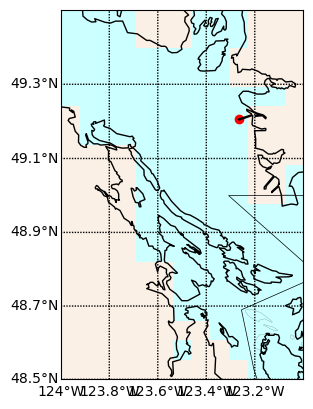

In [172]:
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.drawlsmask(land_color='Linen', ocean_color='#CCFFFF')
map.drawcounties()
#
parallels = np.arange(w_map[2],w_map[3],0.2) # make latitude lines ever 5 degrees from 30N-50N
meridians = np.arange(w_map[0],w_map[1],0.2) # make longitude lines every 5 degrees from 95W to 70W
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
#
bounds = [[0, 26000], [61500, 77000], [107500, 114000], [200000, 203000], [326000, 327000]]
for bound in bounds:
    i_old = 0
    for i in np.argwhere(np.isnan(PNWrivers['ncst'][bound[0]:bound[1], 1]))[:, 0]:
        x, y = map(PNWrivers['ncst'][bound[0]:bound[1], 0][i_old:i],
                 PNWrivers['ncst'][bound[0]:bound[1], 1][i_old:i])
        map.plot(x, y, 'k-')
        i_old = i + 1
x, y = map(grid['nav_lon'].values, grid['nav_lat'].values)
#-123.26524712830536, 49.205453009719676 <--------------------- IWTP
x1, y1 = map(-123.26524712830536, 49.205453009719676)
map.scatter(x1,y1,c='r')

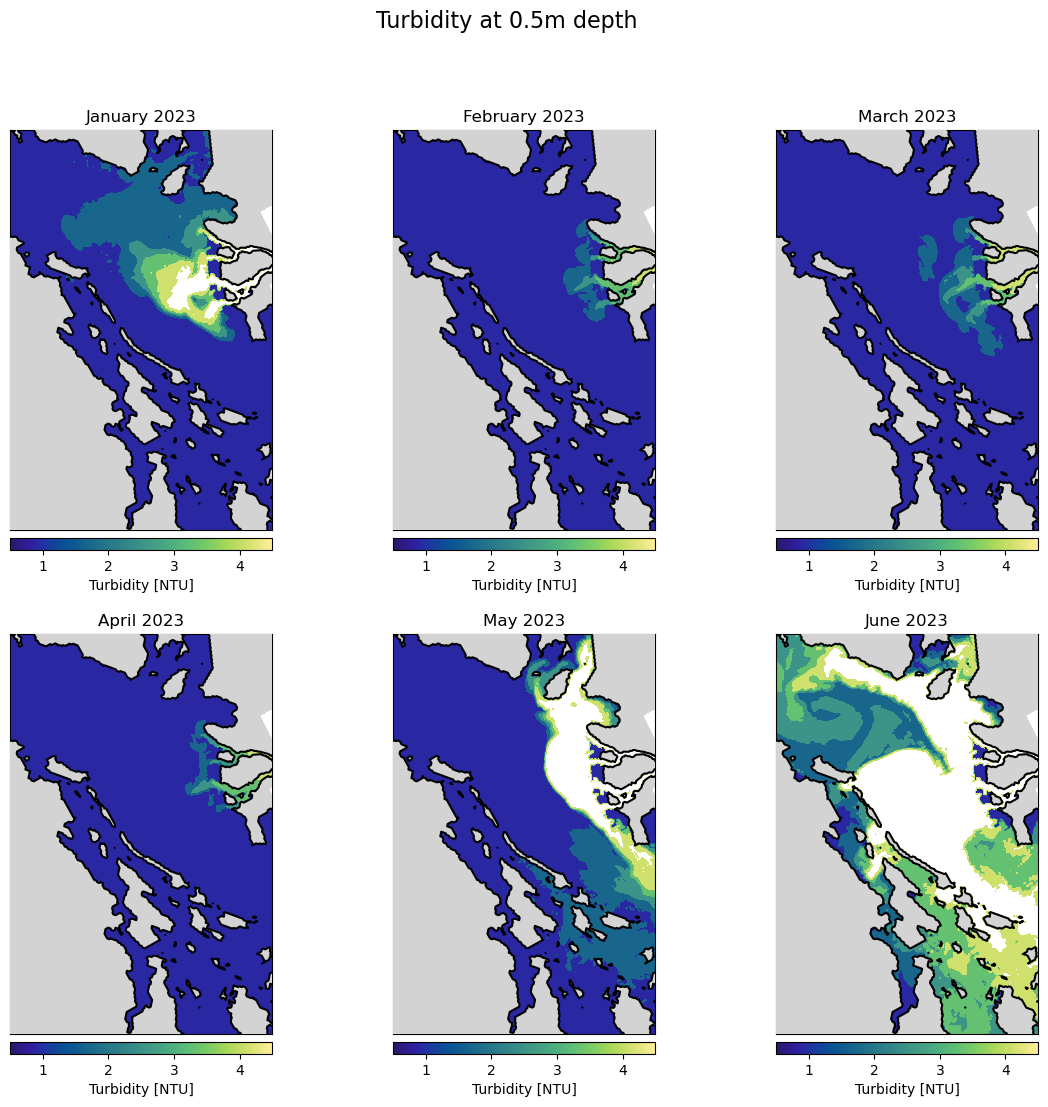

In [191]:
prof=0 # Index for depth <----------
# TURBIDITY PLOT FOR EACH MONTH SINCE JANUARY TO JUNE 2023 
fig=plt.figure(figsize=(14,12))
plt.subplot(2,3,1)
turbidity_jan=map.contourf(x,y,turb_jan[0,prof,:,:],range(0,6,1),cmap=cm.haline)
norm= pc.Normalize(vmin=turbidity_jan.cvalues.min(), vmax=turbidity_jan.cvalues.max())# Continuous colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap = turbidity_jan.cmap)
sm.set_array([])
map.contourf(x, y, grid['Bathymetry'], [-0.01, prof], colors='lightgray', zorder=3)
map.contour( x, y, grid['Bathymetry'], [prof], colors='Black', zorder=4)
cb = map.colorbar(sm,'bottom', ticks=turbidity_jan.levels, size="3%", pad="2%")
plt.title('January 2023',fontsize=12)
cb.set_label('Turbidity [NTU]',fontsize=10)
#
plt.subplot(2,3,2)
turbidity_feb=map.contourf(x,y,turb_feb[0,prof,:,:],range(0,6,1),cmap=cm.haline)
norm= pc.Normalize(vmin=turbidity_feb.cvalues.min(), vmax=turbidity_feb.cvalues.max())# Continuous colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap = turbidity_feb.cmap)
sm.set_array([])
map.contourf(x, y, grid['Bathymetry'], [-0.01, prof], colors='lightgray', zorder=3)
map.contour( x, y, grid['Bathymetry'], [prof], colors='Black', zorder=4)
cb = map.colorbar(sm,'bottom', ticks=turbidity_feb.levels, size="3%", pad="2%")
plt.title('February 2023',fontsize=12)
cb.set_label('Turbidity [NTU]',fontsize=10)
#
plt.subplot(2,3,3)
turbidity_mar=map.contourf(x,y,turb_mar[0,prof,:,:],range(0,6,1),cmap=cm.haline)
norm= pc.Normalize(vmin=turbidity_mar.cvalues.min(), vmax=turbidity_mar.cvalues.max())# Continuous colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap = turbidity_mar.cmap)
sm.set_array([])
map.contourf(x, y, grid['Bathymetry'], [-0.01, prof], colors='lightgray', zorder=3)
map.contour( x, y, grid['Bathymetry'], [prof], colors='Black', zorder=4)
cb = map.colorbar(sm,'bottom', ticks=turbidity_mar.levels, size="3%", pad="2%")
plt.title('March 2023',fontsize=12)
cb.set_label('Turbidity [NTU]',fontsize=10)
#
plt.subplot(2,3,4)
turbidity_apr=map.contourf(x,y,turb_apr[0,prof,:,:],range(0,6,1),cmap=cm.haline)
norm= pc.Normalize(vmin=turbidity_apr.cvalues.min(), vmax=turbidity_apr.cvalues.max())# Continuous colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap = turbidity_apr.cmap)
sm.set_array([])
map.contourf(x, y, grid['Bathymetry'], [-0.01, prof], colors='lightgray', zorder=3)
map.contour( x, y, grid['Bathymetry'], [prof], colors='Black', zorder=4)
cb = map.colorbar(sm,'bottom', ticks=turbidity_apr.levels, size="3%", pad="2%")
plt.title('April 2023',fontsize=12)
cb.set_label('Turbidity [NTU]',fontsize=10)
#
plt.subplot(2,3,5)
turbidity_may=map.contourf(x,y,turb_may[0,prof,:,:],range(0,6,1),cmap=cm.haline)
norm= pc.Normalize(vmin=turbidity_may.cvalues.min(), vmax=turbidity_may.cvalues.max())# Continuous colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap = turbidity_may.cmap)
sm.set_array([])
map.contourf(x, y, grid['Bathymetry'], [-0.01, prof], colors='lightgray', zorder=3)
map.contour( x, y, grid['Bathymetry'], [prof], colors='Black', zorder=4)
cb = map.colorbar(sm,'bottom', ticks=turbidity_may.levels, size="3%", pad="2%")
plt.title('May 2023',fontsize=12)
cb.set_label('Turbidity [NTU]',fontsize=10)
#
plt.subplot(2,3,6)
turbidity_jun=map.contourf(x,y,turb_jun[0,prof,:,:],range(0,6,1),cmap=cm.haline)
norm= pc.Normalize(vmin=turbidity_jun.cvalues.min(), vmax=turbidity_jun.cvalues.max())# Continuous colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap = turbidity_jun.cmap)
sm.set_array([])
map.contourf(x, y, grid['Bathymetry'], [-0.01, prof], colors='lightgray', zorder=3)
map.contour( x, y, grid['Bathymetry'], [prof], colors='Black', zorder=4)
cb = map.colorbar(sm,'bottom', ticks=turbidity_jun.levels, size="3%", pad="2%")
plt.title('June 2023',fontsize=12)
cb.set_label('Turbidity [NTU]',fontsize=10)
plt.suptitle(f'Turbidity at '+ str(round(depth[prof],1)) + f'm depth',fontsize=16)

plt.show()


In [ ]:
# Define the meta data for the movie
FFMpegWriter = animation.writers['ffmpeg']
metadata = dict(title='Turbidity_Depth_JAN_JUN', artist='Vicente',
                comment='Depth variation for each month between January 2023 and June 2023')
writer = FFMpegWriter(fps=2, metadata=metadata)


# Update the frames for the movie
with writer.saving(fig, "Turbidity_Depth_Animation.mp4", 100):
    for i in range(len(depth)):
        fig=plt.figure(figsize=(14,12))
        plt.subplot(2,3,1)
        turbidity_jan=map.contourf(x,y,turb_jan[0,i,:,:],range(0,6,1),cmap=cm.haline)
        norm= pc.Normalize(vmin=turbidity_jan.cvalues.min(), vmax=turbidity_jan.cvalues.max())# Continuous colorbar
        sm = plt.cm.ScalarMappable(norm=norm, cmap = turbidity_jan.cmap)
        sm.set_array([])
        map.contourf(x, y, grid['Bathymetry'], [-0.01, i], colors='lightgray', zorder=3)
        map.contour( x, y, grid['Bathymetry'], [i], colors='Black', zorder=4)
        cb = map.colorbar(sm,'bottom', ticks=turbidity_jan.levels, size="3%", pad="2%")
        plt.title('January 2023',fontsize=12)
        cb.set_label('Turbidity [NTU]',fontsize=10)
        #
        plt.subplot(2,3,2)
        turbidity_feb=map.contourf(x,y,turb_feb[0,i,:,:],range(0,6,1),cmap=cm.haline)
        norm= pc.Normalize(vmin=turbidity_feb.cvalues.min(), vmax=turbidity_feb.cvalues.max())# Continuous colorbar
        sm = plt.cm.ScalarMappable(norm=norm, cmap = turbidity_feb.cmap)
        sm.set_array([])
        map.contourf(x, y, grid['Bathymetry'], [-0.01, i], colors='lightgray', zorder=3)
        map.contour( x, y, grid['Bathymetry'], [i], colors='Black', zorder=4)
        cb = map.colorbar(sm,'bottom', ticks=turbidity_feb.levels, size="3%", pad="2%")
        plt.title('February 2023',fontsize=12)
        cb.set_label('Turbidity [NTU]',fontsize=10)
        #
        plt.subplot(2,3,3)
        turbidity_mar=map.contourf(x,y,turb_mar[0,i,:,:],range(0,6,1),cmap=cm.haline)
        norm= pc.Normalize(vmin=turbidity_mar.cvalues.min(), vmax=turbidity_mar.cvalues.max())# Continuous colorbar
        sm = plt.cm.ScalarMappable(norm=norm, cmap = turbidity_mar.cmap)
        sm.set_array([])
        map.contourf(x, y, grid['Bathymetry'], [-0.01, i], colors='lightgray', zorder=3)
        map.contour( x, y, grid['Bathymetry'], [i], colors='Black', zorder=4)
        cb = map.colorbar(sm,'bottom', ticks=turbidity_mar.levels, size="3%", pad="2%")
        plt.title('March 2023',fontsize=12)
        cb.set_label('Turbidity [NTU]',fontsize=10)
        #
        plt.subplot(2,3,4)
        turbidity_apr=map.contourf(x,y,turb_apr[0,i,:,:],range(0,6,1),cmap=cm.haline)
        norm= pc.Normalize(vmin=turbidity_apr.cvalues.min(), vmax=turbidity_apr.cvalues.max())# Continuous colorbar
        sm = plt.cm.ScalarMappable(norm=norm, cmap = turbidity_apr.cmap)
        sm.set_array([])
        map.contourf(x, y, grid['Bathymetry'], [-0.01, i], colors='lightgray', zorder=3)
        map.contour( x, y, grid['Bathymetry'], [i], colors='Black', zorder=4)
        cb = map.colorbar(sm,'bottom', ticks=turbidity_apr.levels, size="3%", pad="2%")
        plt.title('April 2023',fontsize=12)
        cb.set_label('Turbidity [NTU]',fontsize=10)
        #
        plt.subplot(2,3,5)
        turbidity_may=map.contourf(x,y,turb_may[0,i,:,:],range(0,6,1),cmap=cm.haline)
        norm= pc.Normalize(vmin=turbidity_may.cvalues.min(), vmax=turbidity_may.cvalues.max())# Continuous colorbar
        sm = plt.cm.ScalarMappable(norm=norm, cmap = turbidity_may.cmap)
        sm.set_array([])
        map.contourf(x, y, grid['Bathymetry'], [-0.01, i], colors='lightgray', zorder=3)
        map.contour( x, y, grid['Bathymetry'], [i], colors='Black', zorder=4)
        cb = map.colorbar(sm,'bottom', ticks=turbidity_may.levels, size="3%", pad="2%")
        plt.title('May 2023',fontsize=12)
        cb.set_label('Turbidity [NTU]',fontsize=10)
        #
        plt.subplot(2,3,6)
        turbidity_jun=map.contourf(x,y,turb_jun[0,i,:,:],range(0,6,1),cmap=cm.haline)
        norm= pc.Normalize(vmin=turbidity_jun.cvalues.min(), vmax=turbidity_jun.cvalues.max())# Continuous colorbar
        sm = plt.cm.ScalarMappable(norm=norm, cmap = turbidity_jun.cmap)
        sm.set_array([])
        map.contourf(x, y, grid['Bathymetry'], [-0.01, i], colors='lightgray', zorder=3)
        map.contour( x, y, grid['Bathymetry'], [i], colors='Black', zorder=4)
        cb = map.colorbar(sm,'bottom', ticks=turbidity_jun.levels, size="3%", pad="2%")
        plt.title('June 2023',fontsize=12)
        cb.set_label('Turbidity [NTU]',fontsize=10)
        plt.suptitle(f'Turbidity at '+ str(round(depth[i],1)) + f'm depth',fontsize=16)
        writer.grab_frame()

40